<a href="https://colab.research.google.com/github/PaulRel/PaulRel/blob/main/ML_Rault_Fourel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
* Describe the problem you need to solve
*   Explain whether your project can be treated as a classification or a regression or both.
*   Define the features and the target variable(s) you want to predict.
* Give the algorithms you need to use; it is important to use more than one type of algorithm/model.
* Explain the metrics by which you want to judge the effectiveness of your algorithms.
* Provide details of the validation phase.
---

# **Projet de Machine Learning**

Pour ce projet de Machine Learning, nous nous plongeons dans l'univers des appels téléphoniques marketing d'une institution bancaire portuguaise ayant pour but l'adhésions de noueaux clients. Nos différentes données divisées en 16 variables exposent les différentes caractéristiques des potentiels futurs clients qui ont été démarchés ainsi que le résultat de cette démarche à savoir si oui ou non, ces clients ont accepté de souscrire. L'objectif de la classification est de prédire si le client souscrira un dépôt à terme (variable y).

## Type de problème
Ce projet relève du Machine Learning **supervisé**, et plus précisément d’un problème de **classification binaire** car la variable cible y prend deux valeurs : "yes" (le client souscrit) et "no" (le client ne souscrit pas).

Il ne s'agit pas d’un problème de régression car il ne faut pas prédire une valeur continue, mais une catégorie.
Définition des variables (features et target)
Variable cible (target) :

## Description des variables

* **Variable cible :**

**y** : Indique si le client a souscrit ("yes") ou non ("no") à un dépôt à terme.
* **Variables explicatives :**

On peut regrouper les attributs en différentes catégories :

**Caractéristiques du client** : âge, emploi, situation matrimoniale, niveau d’éducation, défaut de crédit, solde moyen annuel, prêts en cours.

**Détails du dernier contact** : type de contact, jour et mois du contact, durée de l’appel.

**Historique des campagnes** : nombre de contacts précédents, jours depuis le dernier contact, succès ou échec des campagnes passées.

**Remarque :**

* La variable **duration** (durée de l’appel) est très corrélée avec la cible. Son inclusion peut biaiser le modèle car une conversation longue indique souvent une souscription. On pourrait faire deux versions du modèle, avec et sans cette variable.
* La variable **pdays** contient la valeur -1 pour signifier "jamais contacté auparavant". Une transformation sera nécessaire (par exemple, créer une variable binaire indiquant si le client a déjà été contacté ou non).

## Algorithmes étudiés

##  Métriques d’évaluation des modèles
Comme il s'agit d'un problème de classification binaire, plusieurs métriques peuvent être utilisées pour évaluer la performance des modèles :

* **Accuracy**: % de prédictions correctes (mais peut être trompeur si les classes sont déséquilibrées).
* **Precision** : Proportion de vrais positifs parmi les prédictions positives. Important si l’on veut minimiser les faux positifs.
* **Recall** : Proportion de vrais positifs parmi les cas réellement positifs. Crucial si l’on veut minimiser les faux négatifs (ne pas rater un client intéressé).
* **F1-score** : Moyenne harmonique entre précision et rappel, utile pour un bon équilibre entre faux positifs et faux négatifs.
* **AUC-ROC** (Area Under Curve - Receiver Operating Characteristic) : Mesure la capacité du modèle à différencier les classes.

## Validation phase
La validation est essentielle pour garantir la généralisation du modèle. Voici les étapes à suivre :

1. **Prétraitement des données**

* Encodage des variables catégoriques (One-Hot Encoding ou Label Encoding).
* Normalisation ou standardisation des variables numériques si nécessaire.
* Gestion des valeurs -1 dans pdays (création d’une nouvelle variable).
* Division des données en train (80%) et test (20%).
2. **Cross-validation**
* Utilisation de la validation croisée en k-folds (k=5 ou k=10) pour éviter le sur-apprentissage et évaluer la stabilité du modèle.
3. **Optimisation des hyperparamètres**
* Utilisation de GridSearchCV ou RandomizedSearchCV pour trouver les meilleurs paramètres pour chaque modèle.
4. **Test final et analyse des résultats**
* Une fois le meilleur modèle sélectionné, on le teste sur l’ensemble de test et on analyse ses performances via les métriques définies précédemment.
* On peut aussi tracer des courbes ROC et des matrices de confusion pour mieux visualiser les performances.

In [71]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [62]:
# Chargement des données
data = pd.read_csv('bank-full.csv', sep=';')
print("Colonnes : ", data.columns)

df = pd.read_csv("bank.csv", sep=";")

# Affichage des premières lignes
print("\nVisualisation des 1eres lignes de l'échantillon bank.csv.")
print(df.head())

# Afficher les types de données
print(df.info())

Colonnes :  Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

Visualisation des 1eres lignes de l'échantillon bank.csv.
   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330    

# Repartition de la variables cible

## Repartition de la variables cible dans bank.csv

<ipython-input-67-3285d4fccfc3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["y"], palette="pastel")


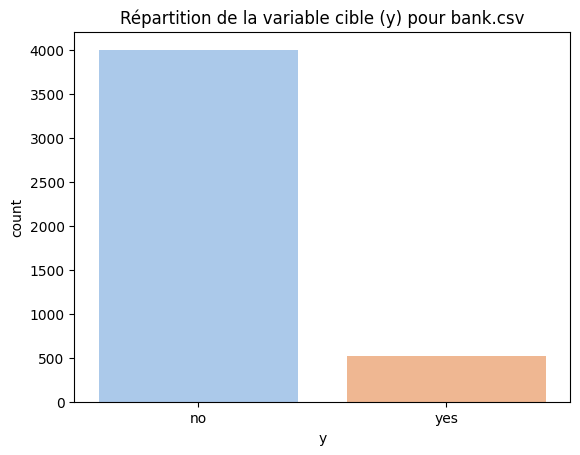

y
no     0.88476
yes    0.11524
Name: proportion, dtype: float64


In [67]:
# Compter le nombre d'observations pour chaque classe
sns.countplot(x=df["y"], palette="pastel")
plt.title("Répartition de la variable cible (y) pour bank.csv")
plt.show()

# Afficher les proportions
print(df["y"].value_counts(normalize=True))


## Repartition de la variables cible dans bank-full.csv

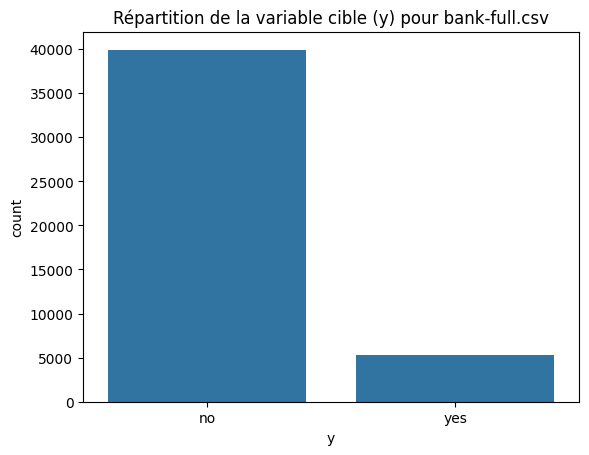

y
no     0.883015
yes    0.116985
Name: proportion, dtype: float64


In [76]:
# Compter le nombre d'observations pour chaque classe
sns.countplot(x=data["y"])
plt.title("Répartition de la variable cible (y) pour bank-full.csv")
plt.show()

# Afficher les proportions
print(data["y"].value_counts(normalize=True))

# Visualisation des variables catégoriques

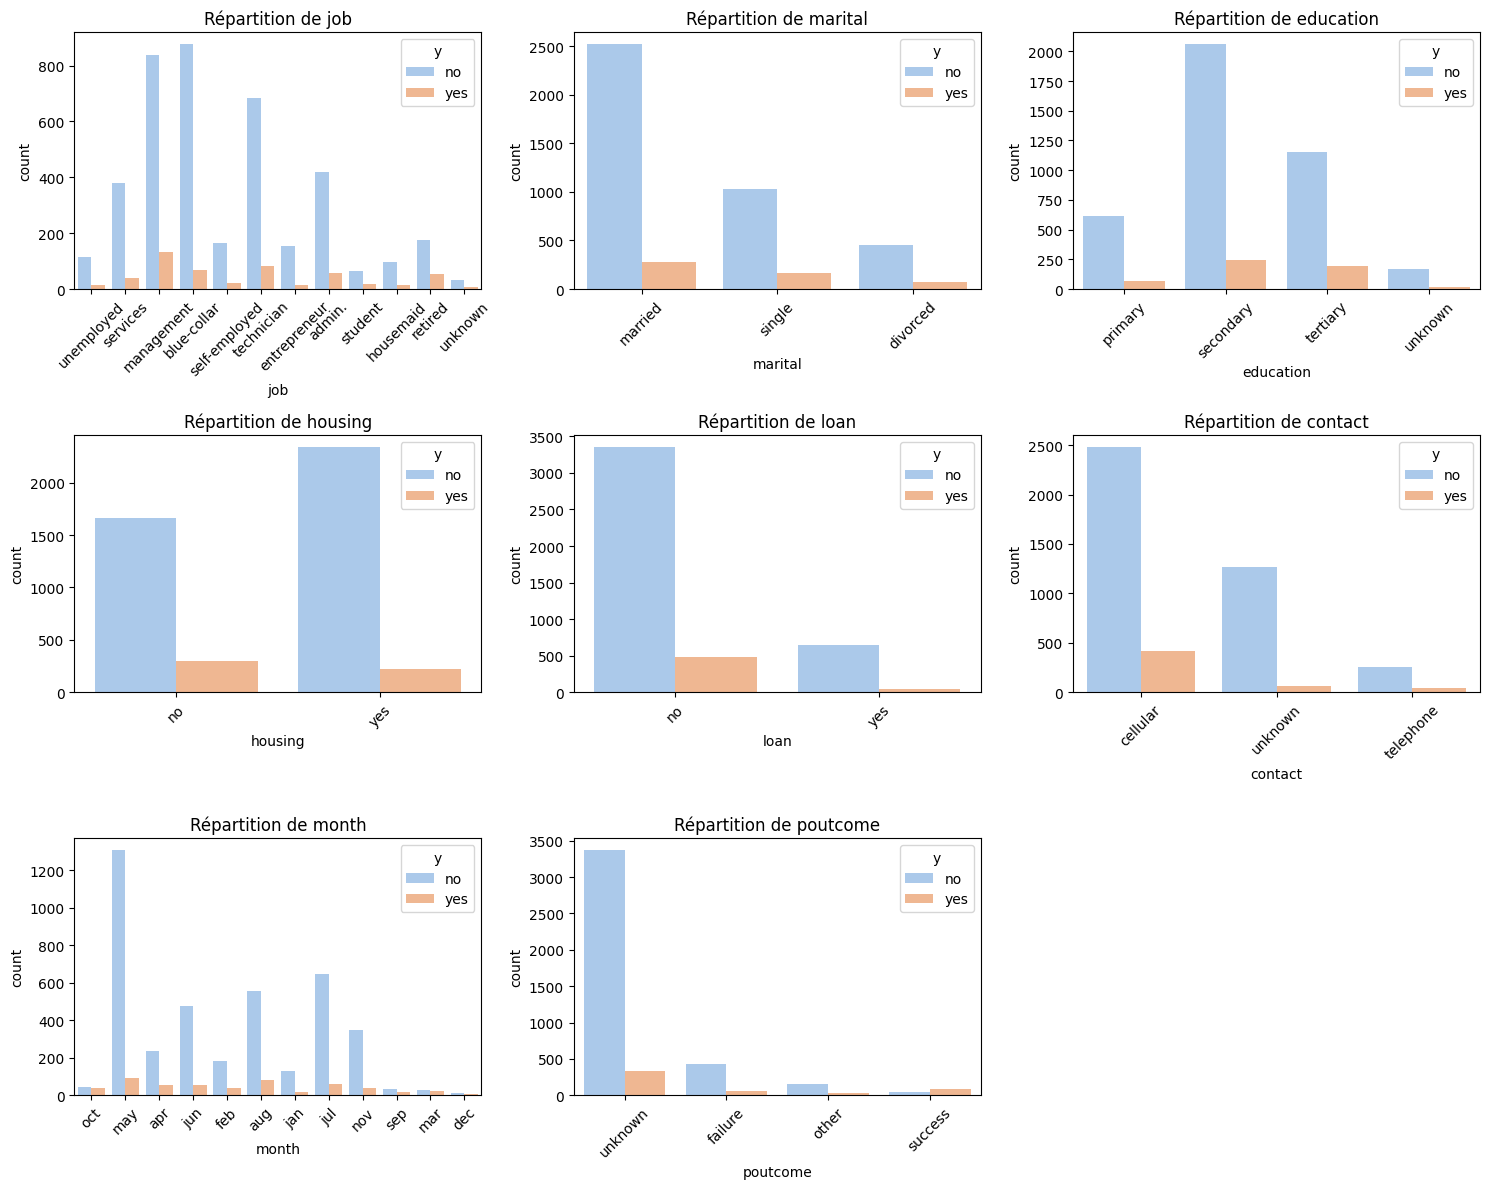

In [73]:
categorical_features = ["job", "marital", "education", "housing", "loan", "contact", "month", "poutcome"]

# Affichage des distributions
plt.figure(figsize=(15, 12))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=df[col], hue=df["y"], palette="pastel")
    plt.xticks(rotation=45)
    plt.title(f"Répartition de {col}")
plt.tight_layout()
plt.show()


# Correlation

# Algorithme knn -- Justine

In [34]:

# Définir les caractéristiques (X) et la cible (y)
X = data.drop(columns='y')  # Enlève la colonne cible 'y'
y = data['y']  # Colonne cible

# Séparer les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Définir les prétraitements pour les colonnes numériques et catégorielles
numeric_features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day', 'poutcome']

# Transformer les variables numériques (normalisation) et les catégorielles (One-Hot Encoding)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),  # Remplir les valeurs manquantes par la médiane
            ('scaler', StandardScaler())  # Normalisation des données numériques
        ]), numeric_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Remplir les valeurs manquantes par la valeur la plus fréquente
            ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encoding pour les variables catégorielles
        ]), categorical_features)
    ])

# Liste des valeurs de k à tester
k_values = range(1, 4000, 100)
accuracies = []

#Evaluer la performance
for k in k_values:
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', KNeighborsClassifier(n_neighbors=k))
    ])

    # Entraîner le modèle
    model.fit(X_train, y_train)

    # Prédire sur l'ensemble de test
    y_pred = model.predict(X_test)

    # Calculer et stocker l'accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.2f}")
    accuracies.append(acc)

# Vérifier que les dimensions sont correctes
print(f"Taille de k_values: {len(k_values)}")
print(f"Taille de accuracies: {len(accuracies)}")

# Tracer le graphique
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.xlabel("Nombre de voisins (k)")
plt.ylabel("Accuracy")
plt.title("Évolution de l'accuracy en fonction de k")
plt.grid()
plt.show()


Accuracy: 0.88
Accuracy: 0.89
Accuracy: 0.89
Accuracy: 0.89
Accuracy: 0.89
Accuracy: 0.89
Accuracy: 0.88
Accuracy: 0.88
Accuracy: 0.88
Accuracy: 0.88
Accuracy: 0.88
Accuracy: 0.88
Accuracy: 0.88


KeyboardInterrupt: 

Dans l'algorithme knn :

1) Gestion des erreurs
- pour les attributs numériques, nous avons fait le choix de remplacer de potentiels valeurs manquantes par la moyenne des valeurs afin de ne pas avoir à supprimer l'exemple entier ( et donc de potentielles informations apportées par leurs autres attributs ) ni la colonne car il s'agit de données importantes.
- pour les attributs categorical , nous avons fait le choix de remplacer de potentiels valeurs manquantes par la valeur revenant le plus souvent (la veleur majoritaire) pour les mêmes raisons.

2) Choix du k

Pour déterminer quel k choisir, nous avons effectué différents tests avec différentes valeurs de k afin de choisir celui qui maximiserait l'accuracy. Ci dessus une courbe représentative de l'accuracy par rapport aux k choisis. En analysant ce graphique, nous avons décidé de choisir 40 pour valeur de k.

3) Désavantages de cet algorithme

L'un des désavantages de cet algorithme est qu'il est extrêmment long.

4) Avantages de cet algorithme

5) Choix du poids des ensembles entrainement/tests/validations
Pour la séparation des ensembles, nous avons décidé d'opter pour la méthode de validation aléatoire

5) Prédication finale

La prédiction finale qui nous est donné est

15=0.9
150=0.89

k=1, Accuracy: 0.88
k=11, Accuracy: 0.90
k=21, Accuracy: 0.90
k=31, Accuracy: 0.90
k=41, Accuracy: 0.90
k=51, Accuracy: 0.90
k=61, Accuracy: 0.90
k=71, Accuracy: 0.90
k=81, Accuracy: 0.90
k=91, Accuracy: 0.90

🎯 Meilleur k: 21 avec une accuracy de 0.90

📢 Prédictions finales sur l'ensemble de test :
['no' 'no' 'no' ... 'no' 'no' 'no']


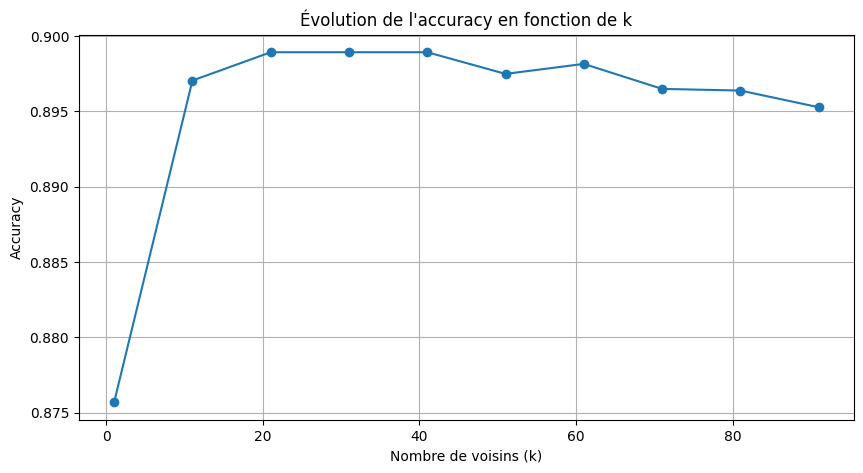

In [37]:
# 📌 Chargement des données
data = pd.read_csv('/content/bank-full.csv', sep=';')

# Définir les caractéristiques (X) et la cible (y)
X = data.drop(columns='y')
y = data['y']

# Séparer les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📌 Définition du préprocesseur (one time only)
numeric_features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day', 'poutcome']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ])

# 📌 Transformer une seule fois les données
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# 📌 Liste des valeurs de k à tester
k_values = range(1, 100, 10)
accuracies = []

# 📌 Boucle pour tester différents k
best_k = None
best_accuracy = 0

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    model.fit(X_train_transformed, y_train)

    # Prédiction
    y_pred = model.predict(X_test_transformed)

    # Calcul de l'accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f"k={k}, Accuracy: {acc:.2f}")
    accuracies.append(acc)

    # 📌 Vérifier si c'est le meilleur modèle
    if acc > best_accuracy:
        best_accuracy = acc
        best_k = k

# 📌 Affichage du meilleur k
print(f"\n🎯 Meilleur k: {best_k} avec une accuracy de {best_accuracy:.2f}")

# 📌 Entraîner KNN avec le meilleur k et faire la prédiction finale
final_model = KNeighborsClassifier(n_neighbors=best_k, n_jobs=-1)
final_model.fit(X_train_transformed, y_train)

# 📌 Prédiction finale sur X_test
final_predictions = final_model.predict(X_test_transformed)
print("\n📢 Prédictions finales sur l'ensemble de test :")
print(final_predictions)

# 📌 Graphique accuracy vs k
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.xlabel("Nombre de voisins (k)")
plt.ylabel("Accuracy")
plt.title("Évolution de l'accuracy en fonction de k")
plt.grid()
plt.show()

# Algorithme naives Bayes -- Pauline

In [38]:
# Importation des bibliothèque
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


🔍 Évaluation du modèle Naive Bayes :

Accuracy Score : 0.8265193370165745

Classification Report :
               precision    recall  f1-score   support

           0       0.93      0.87      0.90       807
           1       0.30      0.45      0.36        98

    accuracy                           0.83       905
   macro avg       0.61      0.66      0.63       905
weighted avg       0.86      0.83      0.84       905



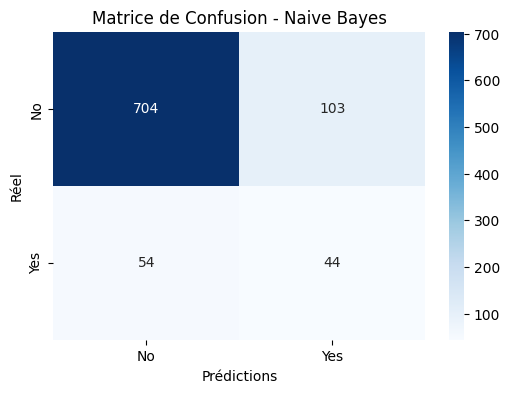

In [39]:
# Encodage des variables catégoriques car Naive Bayes ne fonctionne qu'avec des nombres
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    if col != 'y':  # Ne pas encoder la variable cible pour l'instant
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le  # Sauvegarder l'encodeur pour l'inverse plus tard

# Encodage de la variable cible ('y' : 'yes' = 1, 'no' = 0)
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# Séparation des variables explicatives (X) et de la cible (y)
X = df.drop(columns=['y'])
y = df['y']

# Normalisation des variables numériques (utile pour Naive Bayes)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Séparation en données d'entraînement et de test (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Création et entraînement du modèle Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluation du modèle
print("\n🔍 Évaluation du modèle Naive Bayes :\n")
print("Accuracy Score :", accuracy_score(y_test, y_pred))
print("\nClassification Report :\n", classification_report(y_test, y_pred))

# Matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Prédictions")
plt.ylabel("Réel")
plt.title("Matrice de Confusion - Naive Bayes")
plt.show()

## Analyse des résultats pour Naive Bayes

1. **Score de précision (Accuracy)**

Accuracy = 82.65%

➡️ Cela signifie que le modèle prédit correctement dans 82.65% des cas.

➡️ C'est un bon score global, mais attention, l'accuracy seule peut être trompeuse si les classes sont déséquilibrées.

2. **Rapport de Classification**

Classe	Precision	Recall	F1-score

0 (No)	    0.93	 0.87	   0.90

1 (Yes)	    0.30	 0.45	   0.36

🔹 Classe "0" (client ne souscrit pas de dépôt) :

Très bien prédite avec une précision de 93% et un rappel de 87%. Cela signifie que quand le modèle prédit "No", il est généralement correct.

🔹 Classe "1" (client souscrit un dépôt) :

Précision faible (30%) → Beaucoup de faux positifs.

Rappel moyen (45%) → Il détecte presque la moitié des clients qui acceptent le dépôt, mais en manque encore beaucoup.

F1-score faible (36%), ce qui indique une difficulté à bien modéliser cette classe.

📌 Interprétation :

Le modèle est très bon pour prédire les clients qui refusent (0). Il est mauvais pour prédire ceux qui acceptent (1), ce qui signifie que les clients potentiels sont souvent mal classés.

3. **Matrice de Confusion**

➡️ Problème principal :
* **Faux positifs élevés** (103) : Le modèle classe certains clients comme intéressés alors qu’ils ne le sont pas.
* **Faux négatifs élevés** (54) : Il manque plus de la moitié des clients qui auraient réellement accepté l’offre.

4. **Conséquence pour la banque** :

Si la banque utilise ce modèle pour prédire quels clients appeler, elle risque d’appeler des personnes qui ne sont pas du tout intéressées (faux positifs), ce qui est un coût inutile.
Pire, elle risque de manquer des clients réellement intéressés (faux négatifs), donc perdre des opportunités commerciales.

5. **Pourquoi ces résultats avec Naive Bayes ?**

* Le modèle Naive Bayes suppose que toutes les variables sont indépendantes, ce qui est rarement vrai en marketing.
* Certaines variables influencent fortement la décision du client, par exemple duration (durée de l'appel).
* Le dataset est déséquilibré : il y a plus de "No" que de "Yes", donc Naive Bayes est biaisé vers la classe majoritaire.


## Copie exercice tp Naive Bayes

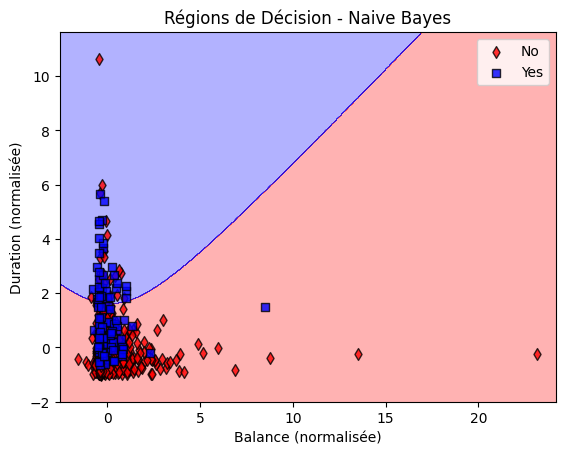

In [61]:
# Import des bibliothèques
from matplotlib.colors import ListedColormap

# Chargement des données
df = pd.read_csv("bank.csv", sep=";")

# Encodage des variables catégoriques
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    if col != 'y':  # Ne pas encoder la variable cible pour l'instant
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

# Encodage de la variable cible ('y' : 'yes' = 1, 'no' = 0)
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# Sélection de 2 variables pour la visualisation
X = df[['balance', 'duration']].values  # Prend balance et duration pour le graphique
y = df['y'].values  # Variable cible

# Normalisation des données (important pour Naive Bayes)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Séparation en train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraînement du modèle Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Fonction de visualisation des régions de décision
def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('d', 's', 'o', '^', 'v')
    colors = ('red', 'blue')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))

    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

# Affichage du graphique
plot_decision_regions(X_test, y_test, gnb)
plt.xlabel("Balance (normalisée)")
plt.ylabel("Duration (normalisée)")
plt.title("Régions de Décision - Naive Bayes")
plt.legend(["No", "Yes"])
plt.show()


Algorithme arbre -- Justine

# Algorithme Perceptron -- Pauline

In [40]:
from sklearn.linear_model import Perceptron


🔍 Évaluation du modèle Perceptron :

Accuracy Score : 0.8121546961325967

Classification Report :
               precision    recall  f1-score   support

           0       0.92      0.87      0.89       807
           1       0.25      0.36      0.29        98

    accuracy                           0.81       905
   macro avg       0.58      0.61      0.59       905
weighted avg       0.84      0.81      0.83       905



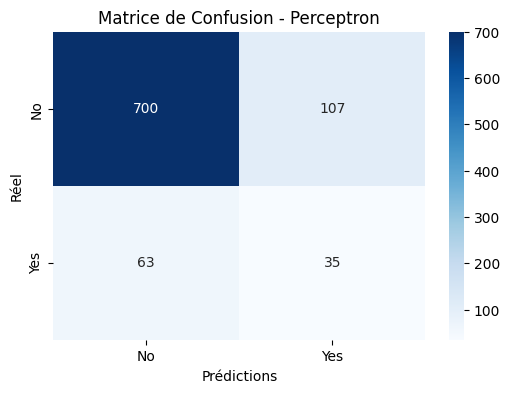

In [41]:
# Charger les données
df = pd.read_csv("bank.csv", sep=";")

# Encodage des variables catégoriques
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    if col != 'y':  # Ne pas encoder la variable cible pour l'instant
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

# Encodage de la variable cible ('y' : 'yes' = 1, 'no' = 0)
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# Séparation des variables explicatives (X) et de la cible (y)
X = df.drop(columns=['y'])
y = df['y']

# Normalisation des données (obligatoire pour Perceptron)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Séparation en données d'entraînement et de test (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Création et entraînement du modèle Perceptron
model = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluation du modèle
print("\n🔍 Évaluation du modèle Perceptron :\n")
print("Accuracy Score :", accuracy_score(y_test, y_pred))
print("\nClassification Report :\n", classification_report(y_test, y_pred))

# Matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Prédictions")
plt.ylabel("Réel")
plt.title("Matrice de Confusion - Perceptron")
plt.show()

1. **Score de précision globale (Accuracy)**

📈 Accuracy = 81.2%

➡️ C'est un bon score global, mais attention : comme les classes sont déséquilibrées, ce chiffre peut être trompeur.

➡️ La performance réelle dépend surtout de la capacité à bien prédire la classe minoritaire (y=1).

2. **Rapport de Classification**

Classe	Précision (Precision)	Rappel (Recall)	F1-score

0 (No)	0.92	0.87	0.89

1 (Yes)	0.25	0.36	0.29

📌 Interprétation :

🔹 La classe 0 (No) est bien prédite avec un rappel de 87% et une précision de 92%.

🔸 La classe 1 (Yes) est très mal détectée :
Précision = 25% → Quand le modèle dit "Yes", il se trompe 3 fois sur 4.

Rappel = 36% → Il n’identifie que 36% des clients qui acceptent vraiment l'offre.

F1-score = 29%, ce qui est très faible.

❌ Le modèle a du mal à apprendre la classe minoritaire y=1 et préfère prédire "No" dans la majorité des cas.

3. **Matrice de Confusion**

* 63 faux négatifs (réel Yes, prédit No)

→ ❌ 67% des clients intéressés sont ignorés.

→ La banque perd des opportunités en ne ciblant pas ces clients.

* 107 faux positifs (réel No, prédit Yes)

→ ❌ Le modèle fait beaucoup d’erreurs en prédisant "Yes" à tort.

→ Cela signifie que la banque contactera des clients non intéressés, ce qui est un coût inutile.

4. **Pourquoi ces résultats ?**

🔸 Le Perceptron est un modèle linéaire. Il ne peut séparer correctement les classes si elles ne sont pas linéairement séparables.

🔸 Déséquilibre des classes : trop peu de y=1, donc il est biaisé vers y=0.

🔸 Variables influentes ? La durée de l'appel (duration) est très déterminante. Un modèle simple comme le Perceptron ne capture pas bien ce type de relation complexe.

# Algorithme Réseau Neurone -- Pauline

In [42]:
# Importation des bibliothèques
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from imblearn.over_sampling import SMOTE

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.6928 - loss: 0.6020 - val_accuracy: 0.8133 - val_loss: 0.4344
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8197 - loss: 0.4220 - val_accuracy: 0.8243 - val_loss: 0.4190
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8366 - loss: 0.3871 - val_accuracy: 0.8177 - val_loss: 0.4098
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8502 - loss: 0.3646 - val_accuracy: 0.8155 - val_loss: 0.4197
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8526 - loss: 0.3569 - val_accuracy: 0.8110 - val_loss: 0.4213
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8618 - loss: 0.3480 - val_accuracy: 0.8232 - val_loss: 0.3967
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8618 - loss: 0.3427 - val_accuracy: 0.8331 - val_loss: 0.3936
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8649 - loss: 0.3209 - val_accuracy: 0.8199 - val

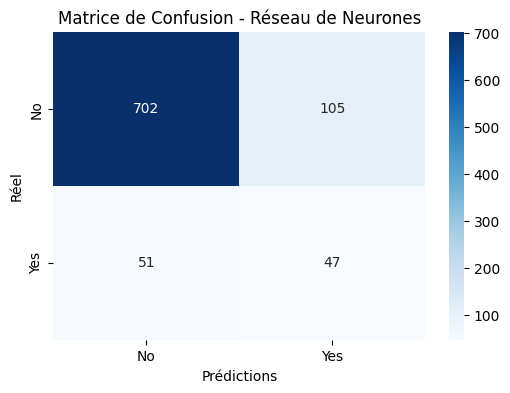

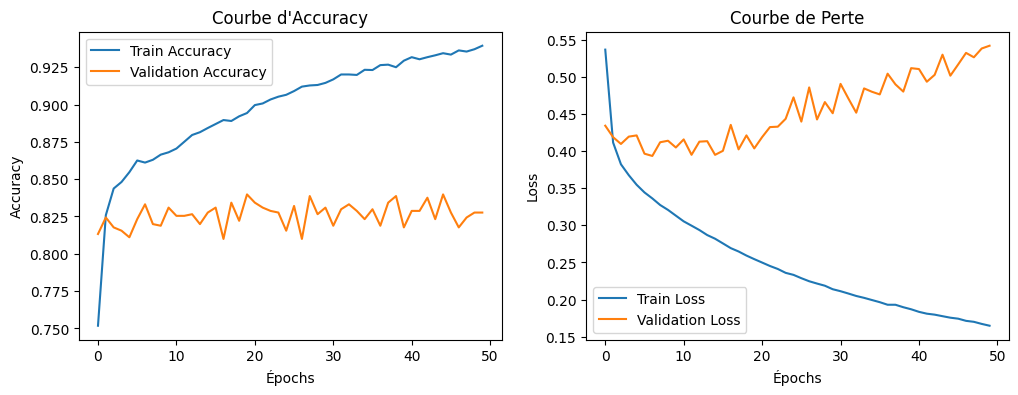

In [45]:
# Charger les données
df = pd.read_csv("bank.csv", sep=";")

# Encodage des variables catégoriques
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    if col != 'y':  # Ne pas encoder la variable cible pour l'instant
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

# Encodage de la variable cible ('y' : 'yes' = 1, 'no' = 0)
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# Suppression des valeurs NaN (si présentes)
df = df.dropna()

# Séparation des variables explicatives (X) et de la cible (y)
X = df.drop(columns=['y'])
y = df['y']

# Normalisation des données (important pour un réseau de neurones)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Séparation en données d'entraînement et de test (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Optionnel : Gérer le déséquilibre des classes avec SMOTE
#smote = SMOTE(random_state=42)
#X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Création du modèle de réseau de neurones
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),  # Couche cachée 1
    Dense(16, activation='relu'),  # Couche cachée 2
    Dense(1, activation='sigmoid')  # Couche de sortie (classification binaire)
])

# Compilation du modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entraînement du modèle
history = model.fit(X_train_resampled, y_train_resampled, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Prédictions sur l'ensemble de test
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Évaluation du modèle
print("\n🔍 Évaluation du modèle Réseau de Neurones :\n")
print("Accuracy Score :", accuracy_score(y_test, y_pred))
print("\nClassification Report :\n", classification_report(y_test, y_pred))

# Matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Prédictions")
plt.ylabel("Réel")
plt.title("Matrice de Confusion - Réseau de Neurones")
plt.show()

# Courbes d'entraînement
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Épochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Courbe d'Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Épochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Courbe de Perte")

plt.show()


# Algorithme kmeans -- Justine

# Algorithme classification hiérarchique -- Justine